**2.** Model checking: in Exercise 2.13, the counts of airline fatalities in 1976–1985 were fitted
to four different Poisson models.

**(a)** For each of the models, set up posterior predictive test quantities to check the following
assumptions: (1) independent Poisson distributions, (2) no trend over time.

**(b)** For each of the models, use simulations from the posterior predictive distributions to
measure the discrepancies. Display the discrepancies graphically and give *p*-values.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from io import StringIO
from sklearn.linear_model import LinearRegression

In [2]:
table = """
Year Accidents Deaths Rate
1976 24 734 0.19
1977 25 516 0.12
1978 31 754 0.15
1979 31 877 0.16
1980 22 814 0.14
1981 21 362 0.06
1982 26 764 0.13
1983 20 809 0.13
1984 16 223 0.03
1985 22 1066 0.15
"""

In [4]:
data = pd.read_csv(StringIO(table), delimiter=" ")
data = data.assign(PasMil = np.round(data.Deaths * 1e8 / data.Rate))

In [6]:
alpha, beta = 0, 0
n = data.shape[0]
S = 1000
theta1 = st.gamma.rvs(alpha + np.sum(data['Accidents']), scale = 1/(beta + n), size = S)
theta2 = st.gamma.rvs(alpha + np.sum(data['Accidents']), scale = 1/(beta + np.sum(data['PasMil'])), size = S)
theta3 = st.gamma.rvs(alpha + np.sum(data['Deaths']), scale = 1/(beta + n), size = S)
theta4 = st.gamma.rvs(alpha + np.sum(data['Deaths']), scale = 1/(beta + np.sum(data['PasMil'])), size = S)

In [7]:
def Tstat(y):
    x = np.arange(len(y)).reshape(-1,1)
    return LinearRegression(fit_intercept=True).fit(x, y).coef_[0]

In [23]:
T_obs = Tstat(data['Accidents'])
Trep1, Trep2 = [], []
for s in range(S):
    yrep1 = st.poisson.rvs(theta1[s], size = n)
    Trep1.append(Tstat(yrep1))
    yrep2 = st.poisson.rvs(theta2[s] * data['PasMil'], size = n)
    Trep2.append(Tstat(yrep2))

In [24]:
# p-values
np.mean(Trep1 > T_obs), np.mean(Trep2 > T_obs)

(0.953, 1.0)

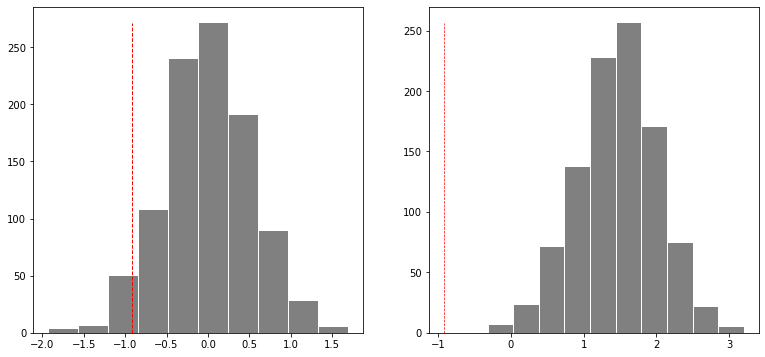

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))
ax[0].hist(Trep1, edgecolor='white', color = 'gray')
ax[0].axvline(T_obs, 0, 0.95, color = 'red', ls = '--', lw = 1)
ax[1].hist(Trep2, edgecolor='white', color = 'gray')
ax[1].axvline(T_obs, 0, 0.95, color = 'red', ls = '--', lw = 0.7);

In [26]:
T_obs = Tstat(data['Deaths'])
Trep1, Trep2 = [], []
for s in range(S):
    yrep1 = st.poisson.rvs(theta3[s], size = n)
    Trep1.append(Tstat(yrep1))
    yrep2 = st.poisson.rvs(theta4[s] * data['PasMil'], size = n)
    Trep2.append(Tstat(yrep2))

In [29]:
# p-values
np.mean(Trep1 > T_obs), np.mean(Trep2 > T_obs)

(0.185, 1.0)

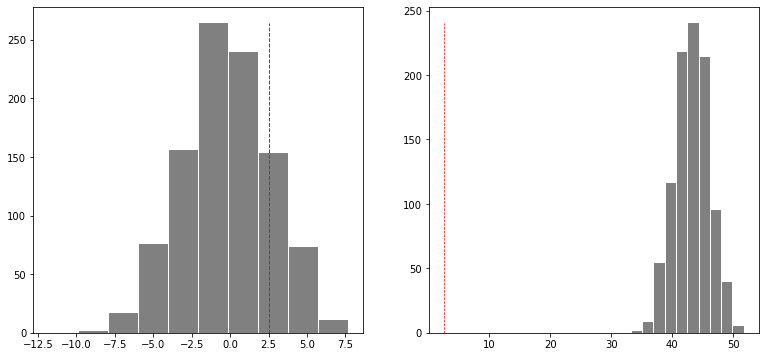

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))
ax[0].hist(Trep1, edgecolor='white', color = 'gray')
ax[0].axvline(T_obs, 0, 0.95, color = 'red', ls = '--', lw = 1)
ax[1].hist(Trep2, edgecolor='white', color = 'gray')
ax[1].axvline(T_obs, 0, 0.95, color = 'red', ls = '--', lw = 0.7);